In [2]:
import numpy as np
import pandas as pd                                  # for data wrangling and analysis
import mglearn

import sklearn as sk                                 # for machine learning
from sklearn.model_selection import train_test_split # split data into 75% training & 25% test sets
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colormaps
# list(colormaps)

In [3]:
X1, y1 = mglearn.datasets.make_forge()

forge_df = pd.DataFrame(X1, columns= ['x1', 'x2'])
forge_df = forge_df.assign(y = y1)
print("Forge dataset dimension: {}".format(forge_df.shape)) # 2 features and 26 obs

display(forge_df.iloc[:5])

Forge dataset dimension: (26, 3)


,x1,x2,y
0,9.963466,4.596765,1
1,11.032954,-0.168167,0
2,11.541558,5.211161,1
3,8.692890,1.543220,0
4,8.106227,4.286960,0


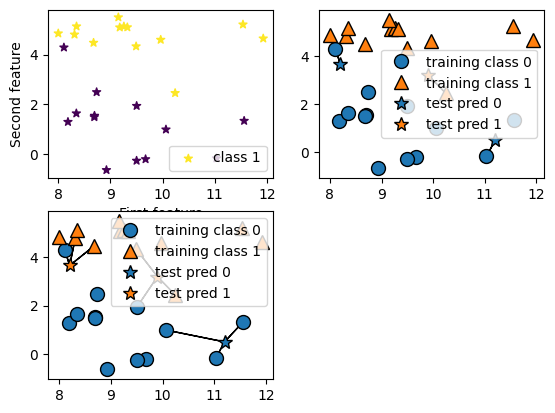

In [6]:
plt.subplot(2, 2, 1)
plt.scatter(forge_df['x1'], forge_df['x2'], c=forge_df['y'], marker= '*')
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.legend(['class 1', 'class 0'], loc="lower right")

plt.subplot(2, 2, 2)
mglearn.plots.plot_knn_classification(n_neighbors=1)

plt.subplot(2, 2, 3)
mglearn.plots.plot_knn_classification(n_neighbors=3)

**k-nearest neighbors algorithm**

In [13]:
X_forge, y_forge = mglearn.datasets.make_forge()
X_forge_train, X_forge_test, y_forge_train, y_forge_test = train_test_split(X_forge, y_forge, random_state=0)

clf = KNeighborsClassifier(n_neighbors=3) # import and instantiate the class
clf.fit(X_forge_train, y_forge_train)     # fit the classifier using the training set

forge_pred = pd.DataFrame(X_forge_test, columns= ['x1', 'x2'])
forge_pred = forge_pred.assign(y_test = y_forge_test,
                               y_pred = clf.predict(X_forge_test))
display(forge_pred)

,x1,x2,y_test,y_pred
0,11.541558,5.211161,1,1
1,10.063938,0.990781,0,0
2,9.491235,4.332248,1,1
3,8.183781,1.295642,0,0
4,8.309889,4.806240,1,1
5,10.240289,2.455444,1,0
6,8.344688,1.638243,0,0


In [14]:
print("Test set accuracy: {:.2f}".format(clf.score(X_forge_test, y_forge_test)))

Test set accuracy: 0.86
